In [2]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score


part_1

In [3]:
#Download dataset from KaggleHub (teacher method)
import kagglehub

path = kagglehub.dataset_download("camnugent/california-housing-prices")
print("Path to dataset files:", path)


Using Colab cache for faster access to the 'california-housing-prices' dataset.
Path to dataset files: /kaggle/input/california-housing-prices


In [4]:
 #Load CSV file
import os

housing_data_path = os.path.join(path, "housing.csv")
df = pd.read_csv(housing_data_path)

df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#Handle missing values
print("Missing values per column:\n", df.isna().sum())
df = df.dropna()
print("\nAfter dropna, shape:", df.shape)

df.head()


Missing values per column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

After dropna, shape: (20433, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
#Encode categorical column (ocean_proximity)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
X = pd.get_dummies(X, columns=["ocean_proximity"], drop_first=True)

print("After encoding, X shape:", X.shape)
X.head()

After encoding, X shape: (20433, 12)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False


In [7]:
#Train/Test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)


Train: (16346, 12) (16346,)
Test : (4087, 12) (4087,)


In [8]:
#Feature scaling (important for Ridge/Lasso)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled train shape:", X_train_scaled.shape)
print("Scaled test shape :", X_test_scaled.shape)

Scaled train shape: (16346, 12)
Scaled test shape : (4087, 12)


Task-2 Step-1

In [9]:
#Baseline Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_train = lin_reg.predict(X_train_scaled)
y_pred_test = lin_reg.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print("Baseline Linear Regression")
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

print("\nFirst 10 coefficients:")
print(np.round(lin_reg.coef_[:10], 4))


Baseline Linear Regression
Train MSE: 4690511174.839978
Test MSE: 4802173538.60416

First 10 coefficients:
[-54375.7065 -54808.0362  13600.0883 -13613.1026  42999.8529 -41119.0676
  16307.3412  74538.7382 -18234.3973   2894.1749]


Task-2 Step-2

In [10]:
#Ridge GridSearchCV
alpha_grid = np.logspace(-4, 3, 20)

ridge = Ridge()
ridge_params = {"alpha": alpha_grid}

ridge_gs = GridSearchCV(
    ridge, ridge_params, cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

ridge_gs.fit(X_train_scaled, y_train)

print("Best Ridge alpha:", ridge_gs.best_params_["alpha"])
print("Best CV MSE:", -ridge_gs.best_score_)


Best Ridge alpha: 33.59818286283781
Best CV MSE: 4731730773.360128


In [11]:
#Evaluate best Ridge on Train/Test
best_ridge = ridge_gs.best_estimator_

y_pred_train = best_ridge.predict(X_train_scaled)
y_pred_test = best_ridge.predict(X_test_scaled)

print("Best Ridge Results")
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))

print("\nFirst 10 Ridge coefficients:")
print(np.round(best_ridge.coef_[:10], 4))

Best Ridge Results
Train MSE: 4691529405.338167
Test MSE: 4803446478.252171

First 10 Ridge coefficients:
[-50781.477  -51078.7059  13626.8743 -12469.51    40271.496  -40710.5286
  17568.0166  74212.8383 -19274.319    2912.8789]


In [12]:
#Lasso GridSearchCV
lasso = Lasso(max_iter=20000)
lasso_params = {"alpha": alpha_grid}

lasso_gs = GridSearchCV(
    lasso, lasso_params, cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

lasso_gs.fit(X_train_scaled, y_train)

print("Best Lasso alpha:", lasso_gs.best_params_["alpha"])
print("Best CV MSE:", -lasso_gs.best_score_)

Best Lasso alpha: 78.47599703514607
Best CV MSE: 4732230233.206557


In [13]:
#Evaluate best Lasso on Train/Test
best_lasso = lasso_gs.best_estimator_

y_pred_train = best_lasso.predict(X_train_scaled)
y_pred_test = best_lasso.predict(X_test_scaled)

print("Best Lasso Results")
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))

print("\nFirst 10 Lasso coefficients:")
print(np.round(best_lasso.coef_[:10], 4))

print("\nNumber of zero coefficients (L1 sparsity):", np.sum(best_lasso.coef_ == 0))


Best Lasso Results
Train MSE: 4691202828.131997
Test MSE: 4803093962.543901

First 10 Lasso coefficients:
[-52086.8603 -52509.4273  13553.5431 -12021.9899  41265.0215 -40572.1752
  15980.4829  74166.5996 -18912.8974   2829.9192]

Number of zero coefficients (L1 sparsity): 0


In [14]:
#Compare Ridge vs Lasso clearly
ridge_train_mse = mean_squared_error(y_train, best_ridge.predict(X_train_scaled))
ridge_test_mse = mean_squared_error(y_test, best_ridge.predict(X_test_scaled))

lasso_train_mse = mean_squared_error(y_train, best_lasso.predict(X_train_scaled))
lasso_test_mse = mean_squared_error(y_test, best_lasso.predict(X_test_scaled))

print("Ridge (L2) Train MSE:", ridge_train_mse)
print("Ridge (L2) Test  MSE:", ridge_test_mse)
print("Lasso (L1) Train MSE:", lasso_train_mse)
print("Lasso (L1) Test  MSE:", lasso_test_mse)

print("\nRidge: min/max coef:", best_ridge.coef_.min(), best_ridge.coef_.max())
print("Lasso: min/max coef:", best_lasso.coef_.min(), best_lasso.coef_.max())
print("Lasso: zero coefs:", np.sum(best_lasso.coef_ == 0))


Ridge (L2) Train MSE: 4691529405.338167
Ridge (L2) Test  MSE: 4803446478.252171
Lasso (L1) Train MSE: 4691202828.131997
Lasso (L1) Test  MSE: 4803093962.543901

Ridge: min/max coef: -51078.70594935575 74212.83830939839
Lasso: min/max coef: -52509.42732953341 74166.59964537884
Lasso: zero coefs: 0


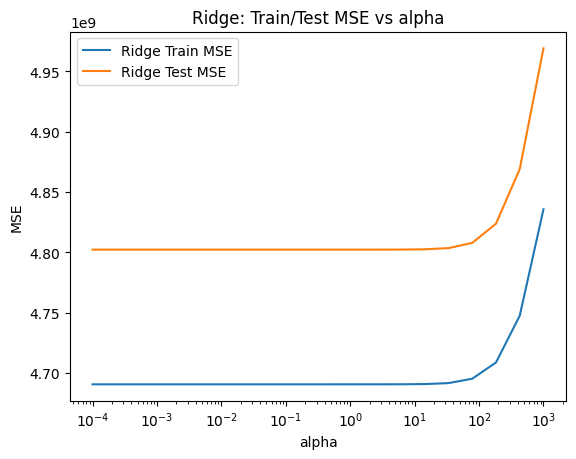

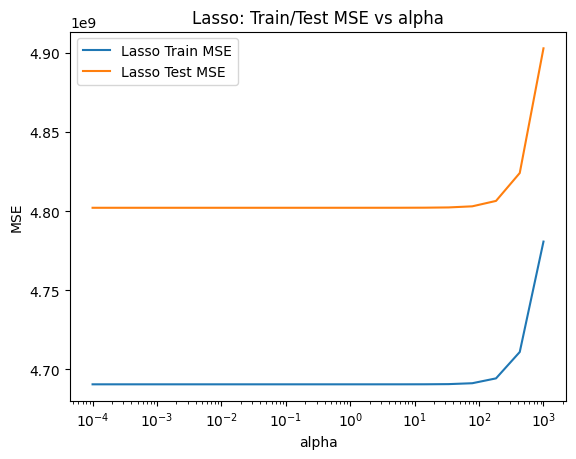

In [15]:
#Plot Train/Test MSE vs alpha (Ridge + Lasso)
ridge_train_list, ridge_test_list = [], []
lasso_train_list, lasso_test_list = [], []

for a in alpha_grid:
    r = Ridge(alpha=a).fit(X_train_scaled, y_train)
    l = Lasso(alpha=a, max_iter=20000).fit(X_train_scaled, y_train)

    ridge_train_list.append(mean_squared_error(y_train, r.predict(X_train_scaled)))
    ridge_test_list.append(mean_squared_error(y_test, r.predict(X_test_scaled)))

    lasso_train_list.append(mean_squared_error(y_train, l.predict(X_train_scaled)))
    lasso_test_list.append(mean_squared_error(y_test, l.predict(X_test_scaled)))

plt.figure()
plt.semilogx(alpha_grid, ridge_train_list, label="Ridge Train MSE")
plt.semilogx(alpha_grid, ridge_test_list, label="Ridge Test MSE")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("Ridge: Train/Test MSE vs alpha")
plt.legend()
plt.show()

plt.figure()
plt.semilogx(alpha_grid, lasso_train_list, label="Lasso Train MSE")
plt.semilogx(alpha_grid, lasso_test_list, label="Lasso Test MSE")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("Lasso: Train/Test MSE vs alpha")
plt.legend()
plt.show()



Part-2

In [16]:
#Load Breast Cancer dataset
from sklearn.datasets import load_breast_cancer

Xc, yc = load_breast_cancer(return_X_y=True)

print("X shape:", Xc.shape)
print("y shape:", yc.shape)
print("Classes:", np.unique(yc))


X shape: (569, 30)
y shape: (569,)
Classes: [0 1]


In [17]:
#Train/Test split (80/20)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    Xc, yc, test_size=0.2, random_state=42, stratify=yc
)

print("Train:", Xc_train.shape, yc_train.shape)
print("Test :", Xc_test.shape, yc_test.shape)


Train: (455, 30) (455,)
Test : (114, 30) (114,)


In [19]:
#Scale features (important for Logistic Regression)
scaler_c = StandardScaler()
Xc_train_scaled = scaler_c.fit_transform(Xc_train)
Xc_test_scaled = scaler_c.transform(Xc_test)


step-1

In [20]:
#Baseline Logistic Regression
log_base = LogisticRegression(max_iter=8000)
log_base.fit(Xc_train_scaled, yc_train)

train_pred = log_base.predict(Xc_train_scaled)
test_pred = log_base.predict(Xc_test_scaled)

print("Baseline Logistic Regression")
print("Train Accuracy:", accuracy_score(yc_train, train_pred))
print("Test Accuracy:", accuracy_score(yc_test, test_pred))

print("\nFirst 10 coefficients:")
print(np.round(log_base.coef_.ravel()[:10], 4))


Baseline Logistic Regression
Train Accuracy: 0.989010989010989
Test Accuracy: 0.9824561403508771

First 10 coefficients:
[-0.5115 -0.5527 -0.4763 -0.5411 -0.2125  0.6483 -0.6021 -0.7042 -0.1672
  0.1997]


step-2

In [21]:
#GridSearchCV for Logistic Regression (C + penalty)
C_grid = np.logspace(-4, 3, 15)

log_model = LogisticRegression(max_iter=8000, solver="saga")

param_grid = {
    "C": C_grid,
    "penalty": ["l1", "l2"]
}

log_gs = GridSearchCV(
    log_model,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

log_gs.fit(Xc_train_scaled, yc_train)

print("Best params:", log_gs.best_params_)
print("Best CV accuracy:", log_gs.best_score_)


Best params: {'C': np.float64(0.1), 'penalty': 'l2'}
Best CV accuracy: 0.9802197802197803


In [22]:
#Evaluate best Logistic Regression
best_log = log_gs.best_estimator_

train_pred = best_log.predict(Xc_train_scaled)
test_pred = best_log.predict(Xc_test_scaled)

print("Best Logistic Regression Results")
print("Train Accuracy:", accuracy_score(yc_train, train_pred))
print("Test Accuracy:", accuracy_score(yc_test, test_pred))

print("\nFirst 10 coefficients:")
print(np.round(best_log.coef_.ravel()[:10], 4))


Best Logistic Regression Results
Train Accuracy: 0.9868131868131869
Test Accuracy: 0.9736842105263158

First 10 coefficients:
[-0.3974 -0.4402 -0.3836 -0.3784 -0.1876 -0.0034 -0.2949 -0.4038 -0.1516
  0.2133]


step-3

In [24]:
#Train L1 and L2 separately using best C
best_C = log_gs.best_params_["C"]

log_l1 = LogisticRegression(max_iter=8000, solver="saga", penalty="l1", C=best_C)
log_l2 = LogisticRegression(max_iter=8000, solver="saga", penalty="l2", C=best_C)

log_l1.fit(Xc_train_scaled, yc_train)
log_l2.fit(Xc_train_scaled, yc_train)

pred_l1_train = log_l1.predict(Xc_train_scaled)
pred_l1_test = log_l1.predict(Xc_test_scaled)

pred_l2_train = log_l2.predict(Xc_train_scaled)
pred_l2_test = log_l2.predict(Xc_test_scaled)

print("L1 Logistic Regression")
print("Train Accuracy:", accuracy_score(yc_train, pred_l1_train))
print("Test Accuracy:", accuracy_score(yc_test, pred_l1_test))

print("\nL2 Logistic Regression")
print("Train Accuracy:", accuracy_score(yc_train, pred_l2_train))
print("Test Accuracy:", accuracy_score(yc_test, pred_l2_test))

print("\nL1 zeros:", np.sum(log_l1.coef_.ravel() == 0))
print("L2 zeros:", np.sum(log_l2.coef_.ravel() == 0))


L1 Logistic Regression
Train Accuracy: 0.9736263736263736
Test Accuracy: 0.9736842105263158

L2 Logistic Regression
Train Accuracy: 0.9868131868131869
Test Accuracy: 0.9736842105263158

L1 zeros: 22
L2 zeros: 0


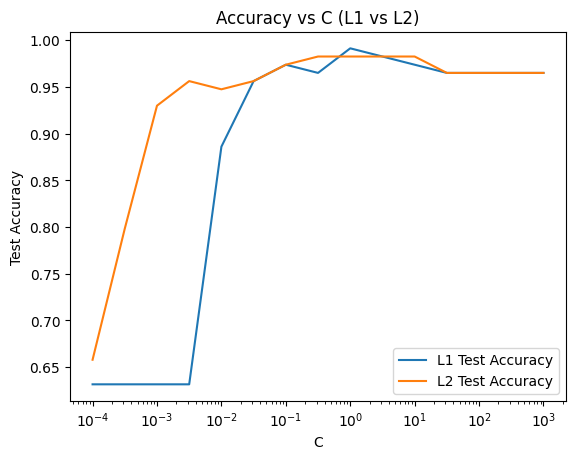

In [23]:
#Plot accuracy vs C for L1 and L2
acc_l1, acc_l2 = [], []

for C in C_grid:
    m1 = LogisticRegression(max_iter=8000, solver="saga", penalty="l1", C=C)
    m2 = LogisticRegression(max_iter=8000, solver="saga", penalty="l2", C=C)

    m1.fit(Xc_train_scaled, yc_train)
    m2.fit(Xc_train_scaled, yc_train)

    acc_l1.append(accuracy_score(yc_test, m1.predict(Xc_test_scaled)))
    acc_l2.append(accuracy_score(yc_test, m2.predict(Xc_test_scaled)))

plt.figure()
plt.semilogx(C_grid, acc_l1, label="L1 Test Accuracy")
plt.semilogx(C_grid, acc_l2, label="L2 Test Accuracy")
plt.xlabel("C")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs C (L1 vs L2)")
plt.legend()
plt.show()
